Epoch 0 | Loss: 1.0022305250167847
Epoch 500 | Loss: 7.642425771337003e-05
Epoch 1000 | Loss: 2.724961086641997e-05
Epoch 1500 | Loss: 2.218860936409328e-05
Epoch 2000 | Loss: 1.8525401173974387e-05
Epoch 2500 | Loss: 1.5240618267853279e-05
Epoch 3000 | Loss: 1.2224138117744587e-05
Epoch 3500 | Loss: 9.498567123955581e-06
Epoch 4000 | Loss: 7.101798018993577e-06
Epoch 4500 | Loss: 5.0698499762802385e-06

Loss Statistics: 
Final Loss: 3.5473105981509434e-06
Initial Loss: 1.0022305250167847
Loss Reduction Rate: 100.00%
Average Loss: 0.002427
Loss Standard Deviation: 0.037170


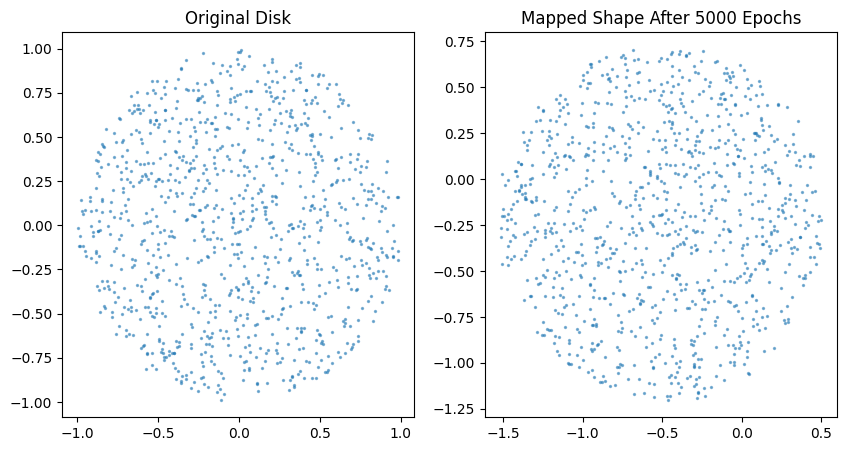

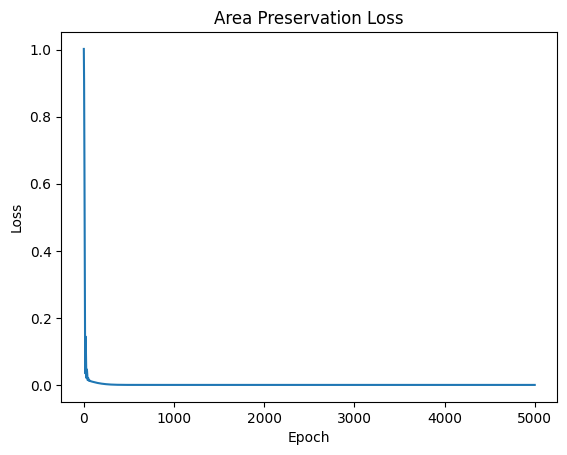

In [1]:
# This file is the 5 part program flow. 

import numpy as np
import torch
from model import area_preserving_NN
from utils import generate_unit_disk, area_preservation_loss
import matplotlib.pyplot as plt

# Part 1 Establishing the domain, D. 
disk_np = generate_unit_disk(1000) # Default parameter value option exists in utils.py. 
disk = torch.tensor(disk_np, dtype=torch.float32) # Creating a PyTorch tensor using disk_np of type float32. 
                                                  # Taking sampled points as a trainable batch, disk (parameter x) ∈ R^(1000×2) to be passed to model(x), jacobian_determinant(model, x) and area_preservation_loss(model, x). 

# Part 2 Defining the neural network map.
model = area_preserving_NN() # model = f_θ(x). Establishing the parametrized function f_θ(x). This function should learn an embedding satisfying |det(Jacobian)| ≈ 1. 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer updates all trainable parameters of 'model' using a learning rate of 0.001. 


# Part 3 and 4: Loss function call and training the network. Each epoch performs a forward pass through the model,
# computes area preservation loss, and applies gradient-based parameter updates via Adam.
losses = [] 
for epoch in range(5000):
    optimizer.zero_grad()
    loss = area_preservation_loss(model, disk)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 500 == 0: # Print every 500th epoch's status. 
        print("Epoch " + str(epoch) + " | Loss: " + str(loss.item()))


# Part 5 Visualizing the results. 
final_loss = losses[-1]
initial_loss = losses[0]
loss_reduction_rate = (initial_loss - final_loss) / initial_loss * 100
avg_loss = np.mean(losses)
std_loss = np.std(losses)

print("\nLoss Statistics: ")
print(f"Final Loss: {final_loss}")
print(f"Initial Loss: {initial_loss}")
print(f"Loss Reduction Rate: {loss_reduction_rate:.2f}%")
print(f"Average Loss: {avg_loss:.6f}")
print(f"Loss Standard Deviation: {std_loss:.6f}")

with torch.no_grad():
    mapped = model(disk).numpy()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Disk")
plt.scatter(disk_np[:, 0], disk_np[:, 1], alpha=0.5, s=2)

plt.subplot(1, 2, 2)
plt.title("Mapped Shape After 5000 Epochs")
plt.scatter(mapped[:, 0], mapped[:, 1], alpha=0.5, s=2)
plt.show()

# Plot loss
plt.figure()
plt.title("Area Preservation Loss")
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

